## Вопрос №1

In [ ]:

У вас SQL база с таблицами:
1) Users(Id, age)
2) Purchases (purchaseId, userId, itemId, date)
3) Items (Id, price).


Напишите SQL запросы для расчета следующих метрик:

А) какую сумму в среднем в месяц тратит:
- пользователи в возрастном диапазоне от 18 до 25 лет включительно
- пользователи в возрастном диапазоне от 26 до 35 лет включительно


# сводная табличка всех покупок выбранной категории покупателей 16-25
SELECT Purchases.purchaseid,Purchases.userId,Users.age, Purchases.itemId,Purchases.date
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId 
    WHERE Users.age BETWEEN 16 AND 25
ORDER BY  Purchases.date ASC LIMIT 10;

 purchaseid | userid | age | itemid |    date
------------+--------+-----+--------+------------
        445 |     21 |  19 |     18 | 2018-01-08
         94 |     21 |  19 |     19 | 2018-01-19
        228 |     19 |  18 |      2 | 2018-01-23
        380 |     21 |  19 |     23 | 2018-01-24
        425 |     19 |  18 |      5 | 2018-03-06
        426 |     19 |  18 |     42 | 2018-03-20
         29 |     20 |  19 |     23 | 2018-05-02
        122 |     21 |  19 |      5 | 2018-05-13
        232 |     21 |  19 |     40 | 2018-05-30
        488 |     18 |  20 |     31 | 2018-06-18

        
# сводная табличка всех покупок категории 16-25 агрегированная за каждый год        
        
SELECT 
    count(Purchases.PurchaseId) as count_purchases,
    count(distinct Purchases.userId) as count_users,
    count(distinct Purchases.itemId) as count_items, 
    sum(Items.price) as total_amount,
    to_char(date_trunc('year', Purchases.date), 'YYYY') as year
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId 
    WHERE Users.age BETWEEN 16 AND 25
GROUP BY year
ORDER BY total_amount DESC;        
        
 count_purchases | count_users | count_items | total_amount | year
-----------------+-------------+-------------+--------------+------
              20 |           4 |          15 |        11665 | 2018
              19 |           4 |          16 |         9530 | 2019
              13 |           3 |          12 |         8101 | 2020        
        

        
Ответ:
SELECT SUM(Items.price)/36 AS total FROM Items WHERE id IN (
    SELECT Purchases.itemId 
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId AND Users.age BETWEEN 16 AND 25
);        
        

# сводная табличка всех покупок выбранной категории покупателей 16-35
SELECT Purchases.purchaseid,Purchases.userId,Users.age,Purchases.itemId,Purchases.date
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId 
    WHERE Users.age BETWEEN 16 AND 35
ORDER BY  Purchases.date ASC LIMIT 10;           
            
 purchaseid | userid | age | itemid |    date
------------+--------+-----+--------+------------
          9 |     13 |  28 |     38 | 2018-01-02
        445 |     21 |  19 |     18 | 2018-01-08
        193 |     28 |  34 |     48 | 2018-01-17
         94 |     21 |  19 |     19 | 2018-01-19
        228 |     19 |  18 |      2 | 2018-01-23
        380 |     21 |  19 |     23 | 2018-01-24
        425 |     19 |  18 |      5 | 2018-03-06
        348 |     13 |  28 |     39 | 2018-03-18
        426 |     19 |  18 |     42 | 2018-03-20
        225 |     13 |  28 |     17 | 2018-04-15


        
        
# сводная табличка всех покупок категории 16-35 агрегированная за каждый год        
        
SELECT 
    count(Purchases.PurchaseId) as count_purchases,
    count(distinct Purchases.userId) as count_users,
    count(distinct Purchases.itemId) as count_items, 
    sum(Items.price) as total_amount,
    to_char(date_trunc('year', Purchases.date), 'YYYY') as year
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId 
    WHERE Users.age BETWEEN 16 AND 35
GROUP BY year
ORDER BY total_amount DESC;

 count_purchases | count_users | count_items | total_amount | year
-----------------+-------------+-------------+--------------+------
              32 |           6 |          22 |        19445 | 2018
              27 |           5 |          21 |        16520 | 2020
              29 |           6 |          21 |        14571 | 2019

 


Ответ:
SELECT SUM(Items.price)/36 AS total FROM Items WHERE id IN (
    SELECT Purchases.itemId 
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId AND Users.age BETWEEN 16 AND 35
);



Б) в каком месяце года выручка от пользователей в возрастном диапазоне 35+ самая большая

# сводная табличка всех покупок выбранной категории покупателей 35+
SELECT Purchases.purchaseid,Purchases.userId,Users.age,Purchases.itemId,Items.price,Purchases.date
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId 
    WHERE Users.age >= 35
ORDER BY  Purchases.date ASC LIMIT 10;


 purchaseid | userid | age | itemid | price |    date
------------+--------+-----+--------+-------+------------
        264 |      4 |  81 |     21 |   212 | 2018-01-01
        112 |     24 |  81 |     43 |   404 | 2018-01-02
        376 |     27 |  81 |     22 |   609 | 2018-01-19
        319 |     10 |  99 |     47 |   133 | 2018-01-20
        436 |      3 |  51 |      8 |   695 | 2018-01-20
        187 |     14 |  47 |     38 |   741 | 2018-01-25
         79 |      1 |  55 |     23 |   211 | 2018-01-25
         62 |      8 |  77 |     46 |   787 | 2018-01-26
        202 |     24 |  81 |     45 |    17 | 2018-01-30
        370 |     29 |  36 |     32 |   448 | 2018-01-31
        

        
# сводная табличка всех покупок выбранной категории покупателей 35+  сгруппированная по месяцам и упорядоченная
# по убыванию суммы покупок
SELECT count(Purchases.purchaseid) as count_purchases,
    count(distinct Purchases.userId) as count_users,
    count(distinct Purchases.itemId) as count_items, 
    sum(Items.price) as total_amount,
    to_char(date_trunc('month', Purchases.date), 'Month YYYY') as month
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId 
    WHERE Users.age >= 35
GROUP BY month
ORDER BY total_amount DESC;       
        
 count_purchases | count_users | count_items | total_amount |     month
-----------------+-------------+-------------+--------------+----------------
              13 |          10 |          11 |         8668 | October   2018
              14 |           9 |          13 |         8128 | January   2019
              15 |          11 |          13 |         8117 | October   2019
              13 |          11 |          12 |         7970 | May       2019
              15 |          11 |          14 |         7690 | December  2020
              14 |          10 |          14 |         7307 | April     2019
              13 |           8 |          10 |         7199 | February  2020
              13 |           9 |          12 |         7146 | December  2019
              13 |          11 |          11 |         6876 | May       2020
              12 |           8 |          11 |         6532 | July      2020
              14 |          12 |          10 |         6527 | February  2019
              11 |          11 |           9 |         6385 | September 2019
              10 |           8 |          10 |         6254 | May       2018
               9 |           9 |           9 |         6185 | November  2019
              10 |           8 |           9 |         5999 | July      2018
               9 |           8 |           8 |         5593 | November  2020
              10 |           9 |           8 |         5429 | June      2020
              10 |           8 |          10 |         5363 | November  2018
              10 |           8 |          10 |         5247 | January   2020
              10 |          10 |           9 |         5200 | December  2018
               9 |           8 |           9 |         5165 | April     2018
              10 |           9 |          10 |         5108 | August    2018
              13 |           8 |          12 |         5073 | August    2020
               8 |           7 |           7 |         5058 | June      2019
              10 |           9 |          10 |         4877 | March     2018
               8 |           6 |           8 |         4593 | March     2020
              10 |           8 |           8 |         4398 | August    2019
              10 |           8 |           9 |         4323 | February  2018
              10 |           9 |          10 |         4257 | January   2018
               9 |           6 |           9 |         3979 | September 2020
               7 |           6 |           6 |         3637 | April     2020
               6 |           6 |           6 |         3136 | September 2018
               8 |           8 |           8 |         2824 | October   2020
               4 |           4 |           3 |         2809 | March     2019
               6 |           6 |           6 |         2756 | June      2018
               7 |           7 |           6 |         2659 | July      2019


ОТВЕТ:
SELECT 
    to_char(date_trunc('month', Purchases.date), 'Month') as month,
    sum(Items.price) as total_amount
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId 
    WHERE Users.age >= 35
GROUP BY month
ORDER BY total_amount DESC LIMIT 1;         
        
   month   | total_amount
-----------+--------------
 May       |        21100


В) какой товар обеспечивает дает наибольший вклад в выручку за последний год


# общая сумма выручки по каждому году упорядоченная по убыванию суммы
SELECT 
    to_char(date_trunc('year', Purchases.date), 'YYYY') as year,
    count(Purchases.purchaseid) as count_purchases,
    sum(Items.price) as total_amount
    FROM Purchases
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId
    
GROUP BY year
ORDER BY total_amount DESC; 

 year | count_purchases | total_amount
------+-----------------+--------------
 2019 |             175 |        94044
 2018 |             159 |        87641
 2020 |             166 |        87475


# самый прибыльный товар за весь период
SELECT 
    count(Purchases.purchaseid) as count_purchases,
    Items.price,
    sum(Items.price) as total_amount,
    Items.id
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId
GROUP BY Items.id
ORDER BY total_amount DESC LIMIT 1;    
    
    
    
 count_purchases | price | total_amount | id
-----------------+-------+--------------+----
              17 |   831 |        14127 | 18
    

ОТВЕТ: ???   
    
    
# таблица упорядоченная по убыванию прибыли от всех товаров
 
    
 count_purchases | price | total_amount | id
-----------------+-------+--------------+----
              17 |   831 |        14127 | 18
              13 |   864 |        11232 | 39
              12 |   932 |        11184 | 33
              13 |   848 |        11024 | 29
              12 |   889 |        10668 |  9
              13 |   787 |        10231 | 46
              16 |   633 |        10128 | 19
              15 |   655 |         9825 | 31
              12 |   816 |         9792 |  6
              16 |   609 |         9744 | 22
              12 |   809 |         9708 | 49
              12 |   768 |         9216 |  1
              16 |   569 |         9104 | 16
               9 |   898 |         8082 | 42
               9 |   833 |         7497 | 28
               8 |   909 |         7272 | 27
              12 |   561 |         6732 | 40
               9 |   741 |         6669 | 38
               8 |   811 |         6488 | 50
              12 |   532 |         6384 | 26
               7 |   695 |         4865 |  8
              12 |   404 |         4848 | 17
               5 |   945 |         4725 | 10
               8 |   589 |         4712 | 24
               5 |   938 |         4690 | 48
              13 |   345 |         4485 | 35
              10 |   448 |         4480 | 32
               5 |   800 |         4000 | 37
               8 |   487 |         3896 | 34
               6 |   620 |         3720 | 25
               6 |   612 |         3672 |  4
               8 |   404 |         3232 | 43
               9 |   321 |         2889 | 15
               8 |   361 |         2888 | 36
               8 |   346 |         2768 | 11
              13 |   212 |         2756 | 21
              12 |   211 |         2532 | 23
              14 |   178 |         2492 |  2
               6 |   384 |         2304 | 13
              10 |   215 |         2150 |  5
               6 |   339 |         2034 | 20
               6 |   314 |         1884 | 30
               9 |   194 |         1746 | 14
              13 |   133 |         1729 | 47
               7 |   203 |         1421 | 41
               6 |   229 |         1374 |  7
              11 |    81 |          891 | 12
               5 |   111 |          555 | 44
               9 |    18 |          162 |  3
               9 |    17 |          153 | 45
    
    
    
Г) топ-3 товаров по выручке и их доля в общей выручке за любой год

ОТВЕТ: 
(топ-3 за все даты):
 
SELECT 
    count(Purchases.purchaseid) as count_purchases,
    Items.price,
    sum(Items.price) as total_amount,
    Items.id
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId
GROUP BY Items.id
ORDER BY total_amount DESC LIMIT 3;

 count_purchases | price | total_amount | id
-----------------+-------+--------------+----
              17 |   831 |        14127 | 18
              13 |   864 |        11232 | 39
              12 |   932 |        11184 | 33

(топ-3 за указанный год: 2019):
SELECT 
    count(Purchases.purchaseid) as count_purchases,
    Items.price,
    sum(Items.price) as total_amount,
    Items.id
    FROM Purchases 
    JOIN Users ON Users.id = Purchases.userId
    JOIN Items ON Items.id = Purchases.itemId
    WHERE to_char(Purchases.date, 'YYYY')='2019'
GROUP BY Items.id
ORDER BY total_amount DESC LIMIT 3;  

 count_purchases | price | total_amount | id
-----------------+-------+--------------+----
               8 |   848 |         6784 | 29
               6 |   831 |         4986 | 18
               8 |   609 |         4872 | 22




In [1]:
import random

Users = """CREATE TABLE IF NOT EXISTS 
    Users (
        id SERIAL PRIMARY KEY, 
        age INT
)"""

Items = """CREATE TABLE IF NOT EXISTS 
    Items (
        id SERIAL PRIMARY KEY, 
        price INT)
"""

Purchases = """CREATE TABLE  IF NOT EXISTS
    Purchases (
        purchaseId INT, 
        userId INT REFERENCES Users(id), 
        itemId INT REFERENCES Items(id), 
        date DATE)
"""

import psycopg2
import pandas as pd
import numpy as np

def random_dates(start, end, n=10): 

    '''   
    unix timestamp is in ns by default. 
    I divide the unix time value by 10**9 to make it seconds (or 24*60*60*10**9 to make it days).
    The corresponding unit variable is passed to the pd.to_datetime function. 
    Values for the (divide_by, unit) pair to select is defined by the out_format parameter.
    for 1 -> out_format='datetime'
    for 2 -> out_format=anything else
    '''
    (divide_by, unit) =  (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by
    date_index = pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit) 
    
    return date_index.to_pydatetime().tolist()



def create_tables(conn):    
    cur = conn.cursor()
    cur.execute(Users)
    cur.execute(Items)
    cur.execute(Purchases)

def generate_items(conn, n=50):
    
    items = [(random.randint(10,1000),) for i in range(n)]
   
    cur = conn.cursor()
    cur.executemany("INSERT INTO Items(price) VALUES (%s)", items)
    conn.commit()


def generate_users(conn, n=10):
    
    users = [(random.randint(10,100),) for i in range(n)]
    
    cur = conn.cursor()
    cur.executemany("INSERT INTO Users(age) VALUES (%s)", users)
    conn.commit()    

def generate_purchases(conn, n=100):
    
    start = pd.to_datetime('2018-01-01')
    end = pd.to_datetime('2020-12-31')   
    dates = random_dates(start, end, n=n)
    
    cur = conn.cursor()
    purchases = [(i, dates[i], random.randint(1, N_Users), random.randint(1,N_Items)) for i in range(n)]
    cur.executemany("INSERT INTO Purchases(purchaseId, date, userId, itemId) VALUES (%s, %s, %s, %s)", purchases)
    conn.commit() 

HOST = "localhost"
DBNAME = "test"
USER = "postgres"
PASSWORD = "postgres"
N_Users = 30
N_Items = 50
N_Purchases = 500


In [2]:
conn = psycopg2.connect(f"host={HOST} dbname={DBNAME} user={USER} password={PASSWORD}")    
cur = conn.cursor()

create_tables(conn)
generate_items(conn, N_Items)
generate_users(conn, N_Users)
generate_purchases(conn, N_Purchases)

In [16]:
di.to_pydatetime().tolist()

[datetime.datetime(2016, 12, 7, 0, 0),
 datetime.datetime(2015, 7, 16, 0, 0),
 datetime.datetime(2017, 3, 19, 0, 0),
 datetime.datetime(2015, 1, 5, 0, 0),
 datetime.datetime(2015, 7, 17, 0, 0),
 datetime.datetime(2015, 4, 14, 0, 0),
 datetime.datetime(2017, 12, 25, 0, 0),
 datetime.datetime(2017, 7, 1, 0, 0),
 datetime.datetime(2015, 11, 19, 0, 0),
 datetime.datetime(2015, 2, 17, 0, 0)]

In [ ]:
cur.execute('select * from ')
res = cur.fetchall()

## Вопрос №2

In [ ]:
import sys,os
from typing import List
from collections import defaultdict, Counter
from itertools import groupby, chain, product
import heapq
from pprint import pprint
import string

#  Одна из возможных реалиазций алгоритма RAKE
class Rake():
    def __init__(
            self,
            text:List[List[str]], 
            stopwords=[],
            max_words=100, 
            min_chars=3
        ):
        
        self.text = text
        self.stopwords = stopwords
        self.blacklist = set(chain(stopwords, string.punctuation))
        self._phrases = set()
        # Частота (freq(w)) определяется как количество фраз, 
        # в которые входит рассматриваемое слово
        self.freq = Counter()
        # Степень (deg(w)) определяется как суммарное количество слов, 
        # из которых состоят фразы, в которых оно содержится.
        self.degree = Counter()
        # Вес слова определим как отношение степени слова к его частоте: 
        # s(w) = deg(w)/freq(w)
        self.token_weights = Counter()
        self.phrase_scores = Counter()
        self.min_chars = min_chars
        self.max_words = max_words
      
        self._generate_phrases()
        self._calc_frequencies()
        self._calc_weights()
        self._calc_scores()
      
        
    def _generate_phrases(self):
        '''Create contender phrases from sentences.'''
        
        for sent in self.text:
            self._phrases.update(self._get_phrase_list(sent))
        
    
    def _get_phrase_list(self,sent):
        '''Grouping the left words into phrases'''
        
        groups = groupby(sent, lambda x: x not in self.blacklist)
        phrases = [tuple(group[1]) for group in groups if group[0]]
        result = []
        
        for phrase in phrases:
            if (
                    phrase
                    and len(' '.join(phrase)) >= self.min_chars
                    and len(phrase) <= self.max_words
            ):
                result.append(phrase)
        #print('_get_phrase_list')
        #pprint(result)
        return result
    
    
    
    def _calc_frequencies(self):
        '''Calculation of frequencies of words'''
        for phrase in self._phrases:
            for token in phrase:
                self.freq[token] += 1
                self.degree[token] += len(phrase) - 1 # 1 вычитается не везде; смысл?
        
        # не во всех примерах Rake используется добавление частоты к degree ; смысл?
        for token in self.freq:
            self.degree[token] += self.freq[token]
        
    
    def _calc_frequencies2(self):
        
        self.freq = Counter(chain.from_iterable(self._phrases))
        def build_occurance_graph():       
        
            graph = defaultdict(lambda: defaultdict(int))
            for phrase in self._phrases:
                # For each phrase in the phrase list, count co-occurances of the
                # word with other words in the phrase.
                #
                # Note: Keep the co-occurances graph as is, to help facilitate its
                # use in other creative ways if required later.
                for (word, coword) in product(phrase, phrase):
                    graph[word][coword] += 1                                
            return graph
        
        graph = build_occurance_graph()
        self.degree = defaultdict(int)
        for token in graph:
            self.degree[token] = sum(graph[token].values())
        
        pprint(graph )
      
    
    def _calc_weights(self):     
        # веса слов s(w) = deg(w)/freq(w)
        for token in self.freq:
            score = self.degree[token] / (self.freq[token] * 1.0)
            self.token_weights[token] += score 
    
   
    def _calc_scores(self):
        
        for phrase in self._phrases:
            #print(phrase,self._phrases.count(phrase))
            score = sum(self.token_weights.get(token,0) for token in phrase)
            self.phrase_scores[' '.join(phrase)] += score  


    def topn(self,n=7,phrase=True):
        '''Get top phrases with ratings'''
        
        if phrase:
            scores = self.phrase_scores
        else:
            scores = self.token_weights
        if n < 0:
            n = len(scores)
        
        return heapq.nlargest(n, 
            scores, 
            key=scores.get
        )     
        
    def phrases(self,scores=True):
        if scores:
            result = sorted(
                self.phrase_scores.items(), 
                key=lambda t:t[1], 
                reverse=True
            )     
        
        else:
            result = sorted(
                self.phrase_scores, 
                key=self.phrase_scores.get, 
                reverse=True
            )
        return result 
    
    def get_token_weights(self,scores=True):
        if scores:
            result = sorted(
                self.token_weights.items(), 
                key=lambda t:t[1], 
                reverse=True
            )     
        
        else:
            result = sorted(
                self.token_weights, 
                key=self.token_weights.get, 
                reverse=True
            )
        return result 

In [31]:
from io import StringIO
from html.parser import HTMLParser
from typing import Dict
import xml.etree.ElementTree as etree
import urllib.request
import re



scripts = re.compile(r"<script[^>]*>.+</script>", re.DOTALL)
styles = re.compile(r"<style[^>]*>.+</style>", re.DOTALL)
head = re.compile(r"<head[^>]*>.+</head>", re.DOTALL)
body = re.compile(r"<body[^>]*>.+</body>", re.DOTALL) 



class Options:
    def __init__(self, url, params={}, headers={}):
        self.url:str = url
        self.query:Dict[str, str] = params
        self.headers:Dict[str, str] = headers


class Response:
    
    def __init__(self, stream):
            self.stream = stream
            self.charset = None     
            self.code = None
            
    def read(self):
        self.charset = self.stream.info().get_content_charset() or "utf-8" 
        self.code = self.stream.code
        data = self.stream.read()
        return data

class Request:        
    """Н-да... и зачем заставлять переизобретать requests?"""
    
    def __init__(self, options:Options):
        self.options = options
        self.retry = 0
        self._retry = self.retry
        self.data = None
        
    
    def _get(self):
        if self.options.query:
            encoded_params = urllib.parse.urlencode(self.options.query)
            self.options.url += "?" + encoded_params
        
        req = urllib.request.Request(url=self.options.url, 
                                     method="GET", 
                                     headers=self.options.headers) 
        stream = urllib.request.urlopen(req)
        self.response = Response(stream)
        return self
    
    def get(self, retry=None):    
        self.retry = retry or self.retry
        
        while self._retry != -1:
            self._get()
            self._retry -=1
            if self.response.code == 200:
                self._retry = self.retry
                break
        return self


    @property
    def content(self):
        self.data = self.response.read()
        return self.data


    @property
    def text(self):
        html = self.content.decode(self.response.charset)
        return html

def clean_html(html):
    """Попытка очистить html подручными средствами"""
    
    html = body.findall(html)[0]
    html = scripts.sub("", html)
    html = styles.sub("", html)
    html = head.sub("", html)
    return html


class TextParser(HTMLParser):
    """А с lxml было бы куда удобнее..."""
    
    def __init__(self):
        super().__init__()
        self._text = StringIO("")
    
    def handle_data(self, data):
        self._text.write(data + " ")
    
    @property
    def text(self):
        return self._text.getvalue()  
    
class Sentenizer():
    """Очень тупой сегментатор на предложения:-)
    Хотите хороший - пользуйтесь модулем razdel
    """
    
    def __init__(self, pattern=r"[.?!]{1,}"):
        self.pattern = re.compile(pattern)
    
    def sentenize(self, text):
        for sent in self.pattern.split(text):
            yield sent   


    
class Tokenizer:
    """В nltk, gensim, spacy есть очень хорошие токенизаторы.
    Но раз требуют изобретать велосипед будем изобретать..."""
    
    def __init__(self, pattern=r"(((?![\d])\w)+)"):
        self.pattern = re.compile(pattern)
    
    def tokenize(self, text, stopwords=[], min_len=3):
        for word in self.pattern.findall(text):
            word =  word[0].strip().lower()
            if word not in stopwords and len(word) > min_len:
                yield word
            




862


In [21]:
# Получение google rss в формате xml
url = "https://news.google.com/rss/search"
params = {"q":"", "hl":"en-US", "gl":"US","ceid":"US:en"}
headers = {
    'User-Agent': ('Mozilla/5.0 (Windows NT 6.0; rv:14.0) Gecko/20100101 '
                  'Firefox/14.0.1'),

}
opt = Options(url, params, headers)

opt.query.update({"q":"Russia"})
req = Request(opt)
try:
    rsspage = req.get().text
except Exception as err:
    print(err)
else:
    print(req.response.code)
       

200


In [106]:
#rsspage

In [32]:

tz = Tokenizer()
stz = Sentenizer()

def download(rss):
    tree = etree.XML(rss)
    # предложения на слова: [[cлово, слово слово],[cлово, слово слово],...]
    # требуется на вход алгоритму RAKE
    sents = [] 
    
    for elem in tree.findall(".//item/link"):
        link = elem.text
        req = Request(Options(link, headers=headers))
        print(link)
        try:
            page = req.get().text
        except Exception as err:
            print(err)
        else:
            parser = TextParser()
            parser.feed(clean_html(page))
            #print(parser.text)
            for sent in stz.sentenize(parser.text):
                sent = list(tz.tokenize(sent)) 
                sents.append(sent)
            
    return sents

sents = download(rsspage)    
print("end")   



    

https://www.nytimes.com/2020/11/01/world/europe/russia-wine-black-sea.html
https://www.wsj.com/articles/european-unity-is-tested-by-threats-from-russia-turkey-11604316401
https://www.washingtonpost.com/world/europe/russia-biden-trump-election/2020/10/31/1186305c-184f-11eb-8bda-814ca56e138b_story.html
https://www.voanews.com/usa/former-nsa-contractor-apply-citizenship-russia
https://www.theguardian.com/world/2020/nov/02/russias-sausage-king-killed-in-moscow-after-crossbow-attack-vladimir-marugov
https://www.themoscowtimes.com/2020/11/02/coronavirus-in-russia-the-latest-news-nov-2-a69117
https://www.theguardian.com/world/2020/nov/01/russias-remote-regions-struggle-to-cope-with-burgeoning-covid-cases
https://www.theguardian.com/us-news/2020/nov/02/trump-us-election-disinformation-russia
https://www.theguardian.com/world/2020/nov/01/russia-rules-out-cutting-fossil-fuel-production-in-next-few-decades
https://www.nytimes.com/2020/10/31/world/europe/russian-provinces-coronavirus-putin.html
ht

https://www.express.co.uk/news/uk/1354769/Russia-news-spy-boat-UK-faslane-putin-trident-missile-nuclear-deterrent
https://www.space.com/russia-announces-reusable-rocket-amur
https://www.nytimes.com/2020/10/19/opinion/trump-campaign-rudy-giuliani.html
https://www.dw.com/en/alexei-navalny-poisoning-investigation-council-of-europe/a-55430780
https://www.nytimes.com/2020/10/25/video/russia-us-election-disinformation.html
https://www.thedailybeast.com/russia-backed-twitter-accounts-pushed-qanon-theory-right-from-its-start-says-report
https://www.nytimes.com/2020/10/03/opinion/russia-hogweed.html?partner=naver
https://www.wsj.com/articles/how-russia-today-skirts-high-tech-blockade-to-reach-u-s-readers-11602078094
https://www.nbcnews.com/news/world/investigators-probe-possible-ecological-catastrophe-russia-s-kamchatka-region-n1242043
https://www.politico.com/news/2020/10/06/trump-russia-ratcliffe-426868
https://tass.com/society/1218963
https://www.ft.com/content/84ec2707-e829-4bc6-b81c-e19453

In [124]:
from pprint import pprint
# ~800  английских стоп-слов
stopwords = Request(Options("https://countwordsfree.com/stopwords/english/txt")).get().text.split()
#  плюс прочий высокочастотный хлам из-за того, что загружается не чистый текст статьи, а весь html

stopwords += ('close politics business october november year years podcast market markets group event events power live'
              'york official officials american regional international political times newsletters opinion'
              'published  subscribe global internet tech image email toggle search'
              'news skip continue submit contact cashback sections subscribe'
              'toggle dark mode video media time including support report privacy policy cookie switch edition'
             'назад международным сайтам gdpr журналисты запросить дополнительную'
             'новости продукция обратная связь запросить'
             'телефон свяжитесь нами'
             'журналисты gdpr запросить дополнительную журналисты'
             'gdpr информацию журналисты'
             ).split()
print(len(stopwords))

rake = Rake(sents, stopwords)
#print(len(rake.phrase_scores))
phrases = rake.phrases(scores=False)
print(len(phrases))
#pprint(rake.topn(50, phrase=False))
#pprint(phrases[:100])

922
6593


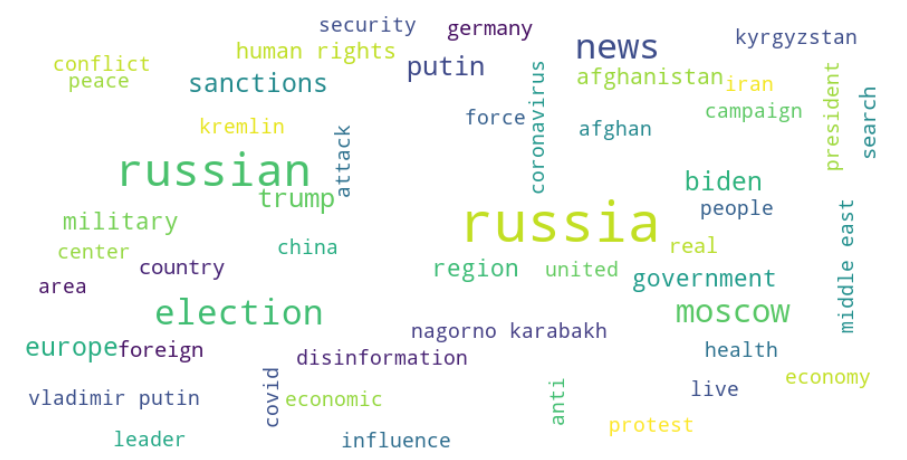

In [125]:

from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, max_font_size=50, max_words=50, background_color="white")
# wordcloud внутри сам вычисляет частотные слова и поэтому результат не совсем такой какой хочется... 
# можно было повыкидывать, например, прилагательные, но для этого нужно делать лемматизацию.

wordcloud.generate(" ".join(phrases[:2000]))
#wordcloud.generate_from_frequencies(dict(rake.phrases())) # а так не получается, если ему подсунуть свой словарь с вычисленными весами слов

plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



## Вопрос №3

In [ ]:
Представьте, что перед вами поставлена задача - создать инструмент для выделения нецензурной брани в текстах.

1) Как вы будете ее решать?
2) Какие подходы, инструменты будете использовать?
3) Попробуйте описать основные этапы решения данной задачи?
4) Как будете оценивать качество созданного инструмента?

Ответы:
1) Ну, во-первых, нужно определиться с тем, что считать за "мат". Образования от традиционных 4-5-7-13 корней или что-то еще?
2) Можно взять эти корни и создать из них словарь всевозможных вариантов с приставками, суффиксами и окончаниями. 
   Затем создаем компактный trie (префиксное дерево) для поиска по префиксам.
3) Нормализация текста (токенизация, лемматизация), быстрый поиск на вхождение в дереве.  
4) Хороший вопрос. Надо подумать :-)

In [3]:
# Ну а кто-то со словарями не заморачивался....
# очень древний код "украденный" из исходников на перле.... всегда любил этот язык, но писать на нем так и не рискнул.
# не правда ли, ну кто еще кроме Perl программиста додумается решить такую задачу в одну охренительно длинную строку...
import re


def is_obscene(string):
        
        expr = r'a[\W_]*s[\W_]*s(?:[\W_]*e[\W_]*s)?|f[\W_]*u[\W_]*c[\W_]*k(?:[\W_]*i[\W_]*n[\W_]*g)?|ж[\W_]*(?:[ыиiu][\W_]*[дd](?:[\W_]*[уыаyiau]|[\W_]*[оo0][\W_]*[вbv])?|[оo0][\W_]*[пnp][\W_]*(?:[аa](?:[\W_]*[хxh])?|[уеыeyiu]|[оo0][\W_]*[йj]))|[дd][\W_]*[еe][\W_]*[рpr][\W_]*(?:[ьb][\W_]*)?[мm][\W_]*[оуеаeoya0u](?:[\W_]*[мm])?|[чc][\W_]*[мm][\W_]*(?:[оo0]|[ыi][\W_]*[рpr][\W_]*[еиьяeibu])|[сsc][\W_]*[уuy][\W_]*(?:(?:[чc][\W_]*)?[кk][\W_]*[ауиiyau](?:[\W_]*[нhn](?:[\W_]*[оo0][\W_]*[йj]|[\W_]*[уаыyiau])?)?|[чc][\W_]*(?:(?:[ьb][\W_]*)?(?:[еёяиeiu]|[еиeiu][\W_]*[йj])|[аa][\W_]*[рpr][\W_]*[ыауеeyiau]))|[гrg][\W_]*(?:[аоoa0][\W_]*(?:[нhn][\W_]*[дd][\W_]*[аоoa0][\W_]*[нhn](?:[\W_]*[ыуyiu])?|[вbv][\W_]*[нhn][\W_]*[оаoa0](?:[\W_]*(?:[мm]|[еe][\W_]*[дd](?:[\W_]*[ыуаеeyiau]|[\W_]*[оаoa0][\W_]*[мm](?:[\W_]*[иiu])?)?))?)|[нhn][\W_]*(?:[иiu][\W_]*[дd][\W_]*(?:[ыуеаeyiau]|[оo0][\W_]*[йj])|[уyu][сsc](?:[\W_]*[аыуyiau]|[\W_]*[оаoa0][\W_]*[мm](?:[\W_]*[иiu])?)?))|(?:[нhn][\W_]*[еe][\W_]*)?(?:(?:[з3z][\W_]*[аa]|[оo0][тt]|[пnp][\W_]*[оo0]|[пnp][\W_]*(?:[еe][\W_]*[рpr][\W_]*[еe]|[рpr][\W_]*[оеиeiou0]|[иiu][\W_]*[з3z][\W_]*[дd][\W_]*[оo0])|[нhn][\W_]*[аa]|[иiu][\W_]*[з3z]|[дd][\W_]*[оo0]|[вbv][\W_]*[ыi]|[уyu]|[рpr][\W_]*[аa][\W_]*[з3z]|[з3z][\W_]*[лl][\W_]*[оo0]|[тt][\W_]*[рpr][\W_]*[оo0]|[уyu])[\W_]*)?(?:[вbv][\W_]*[ыi][\W_]*)?(?:[ъьb][\W_]*)?(?:[еёe][\W_]*[бb6](?:(?:[\W_]*[оеёаиуeioyau0])?(?:[\W_]*[нhn](?:[\W_]*[нhn])?[\W_]*[яуаиьiybau]?)?(?:[\W_]*[вbv][\W_]*[аa])?(?:(?:[\W_]*(?:[иеeiu]ш[\W_]*[ьb][\W_]*[сsc][\W_]*я|[тt][\W_]*(?:(?:[ьb][\W_]*)?[сsc][\W_]*я|[ьb]|[еe][\W_]*[сsc][\W_]*[ьb]|[еe]|[оo0]|[иiu][\W_]*[нhn][\W_]*[уыеаeyiau])|(?:щ[\W_]*(?:[иiu][\W_]*[йj]|[аa][\W_]*я|[иеeiu][\W_]*[еe]|[еe][\W_]*[гrg][\W_]*[оo0])|ю[\W_]*[тt])(?:[\W_]*[сsc][\W_]*я)?|[еe][\W_]*[мтmt]|[кk](?:[\W_]*[иаiau])?|[аa][\W_]*[лl](?:[\W_]*[сsc][\W_]*я)?|[лl][\W_]*(?:[аa][\W_]*[нhn]|[оаoa0](?:[\W_]*[мm])?|(?:[иiu][\W_]*)?[сsc][\W_]*[ьяb]|[иiu]|[аa][\W_]*[сsc][\W_]*[ьb])|[рpr][\W_]*[ьb]|[сsc][\W_]*[яьb]|[нhn][\W_]*[оo0]|[чc][\W_]*(?:[иiu][\W_]*[хxh]|[еe][\W_]*[сsc][\W_]*[тt][\W_]*[ьиibu](?:[\W_]*ю)?)|(?:[тt][\W_]*[еe][\W_]*[лl][\W_]*[ьb][\W_]*[сsc][\W_]*[кk][\W_]*|[сsc][\W_]*[тt][\W_]*|[лl][\W_]*[иiu][\W_]*[вbv][\W_]*|[чтtc][\W_]*)?(?:[аa][\W_]*я|[оo0][\W_]*[йемejm]|[ыi][\W_]*[хйеejxh]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[иiu][\W_]*[еe]|[оo0][\W_]*[мm][\W_]*[уyu]|[иiu][\W_]*[йj]|[еe][\W_]*[вbv]|[иiu][\W_]*[мm](?:[\W_]*[иiu])?)|[чтыйилijltcu]))?)|[\W_]*[ыi](?:(?:[\W_]*[вbv][\W_]*[аa]|[\W_]*[нhn](?:[\W_]*[нhn])?)(?:(?:[\W_]*(?:[иеeiu]ш[\W_]*[ьb][\W_]*[сsc][\W_]*я|[тt][\W_]*(?:[ьb][\W_]*[сsc][\W_]*я|[ьb]|[еe][\W_]*[сsc][\W_]*[ьb]|[еe]|[иiu][\W_]*[нhn][\W_]*[уыеаeyiau])|(?:щ[\W_]*(?:[иiu][\W_]*[йj]|[аa][\W_]*я|[иеeiu][\W_]*[еe]|[еe][\W_]*[гrg][\W_]*[оo0])|ю[\W_]*[тt])(?:[\W_]*[сsc][\W_]*я)?|[еe][\W_]*[мтmt]|[лl][\W_]*(?:(?:[иiu][\W_]*)?[сsc][\W_]*[ьяb]|[иiu]|[аa][\W_]*[сsc][\W_]*[ьb])|(?:[сsc][\W_]*[тt][\W_]*|[лl][\W_]*[иiu][\W_]*[вbv][\W_]*|[чтtc][\W_]*)?(?:[аa][\W_]*я|[оo0][\W_]*[йемejm]|[ыi][\W_]*[хйеejxh]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[иiu][\W_]*[еe]|[оo0][\W_]*[мm][\W_]*[уyu]|[иiu][\W_]*[йj]|[еe][\W_]*[вbv]|[иiu][\W_]*[мm](?:[\W_]*[иiu])?))))|[рpr][\W_]*[ьb]))|я[\W_]*[бb6](?:[\W_]*[оеёаиуeioyau0])?(?:(?:[\W_]*[нhn](?:[\W_]*[нhn])?[\W_]*[яуаиьiybau]?)?(?:(?:[\W_]*(?:[иеeiu]ш[\W_]*[ьb][\W_]*[сsc][\W_]*я|[тt][\W_]*(?:[ьb][\W_]*[сsc][\W_]*я|[ьb]|[еe][\W_]*[сsc][\W_]*[ьb]|[еe]|[иiu][\W_]*[нhn][\W_]*[уыеаeyiau])|(?:щ[\W_]*(?:[иiu][\W_]*[йj]|[аa][\W_]*я|[иеeiu][\W_]*[еe]|[еe][\W_]*[гrg][\W_]*[оo0])|ю[\W_]*[тt])(?:[\W_]*[сsc][\W_]*я)?|[еe][\W_]*[мтmt]|[кk](?:[\W_]*[иаiau])?|[аa][\W_]*[лl](?:[\W_]*[сsc][\W_]*я)?|[лl][\W_]*(?:[аa][\W_]*[нhn]|[оаoa0](?:[\W_]*[мm])?|(?:[иiu][\W_]*)?[сsc][\W_]*[ьяb]|[иiu])|[рpr][\W_]*[ьb]|[сsc][\W_]*[яьb]|[нhn][\W_]*[оo0]|[чc][\W_]*(?:[иiu][\W_]*[хxh]|[еe][\W_]*[сsc][\W_]*[тt][\W_]*[ьиibu](?:[\W_]*ю)?)|(?:[тt][\W_]*[еe][\W_]*[лl][\W_]*[ьb][\W_]*[сsc][\W_]*[кk][\W_]*|[сsc][\W_]*[тt][\W_]*|[лl][\W_]*[иiu][\W_]*[вbv][\W_]*|[чтtc][\W_]*)?(?:[аa][\W_]*я|[оo0][\W_]*[йемejm]|[ыi][\W_]*[хйеejxh]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[иiu][\W_]*[еe]|[оo0][\W_]*[мm][\W_]*[уyu]|[иiu][\W_]*[йj]|[еe][\W_]*[вbv]|[иiu][\W_]*[мm](?:[\W_]*[иiu])?)|[чмйилijlmcu]))|(?:[\W_]*[нhn](?:[\W_]*[нhn])?[\W_]*[яуаиьiybau]?)))|я[\W_]*[бb6][\W_]*(?:[еёаиуeiyau][\W_]*)?(?:[нhn][\W_]*(?:[нhn][\W_]*)?(?:[яуаиьiybau][\W_]*)?)?[тt])|[сsc][\W_]*[ьъb][\W_]*[еяёe][\W_]*[бb6][\W_]*(?:[уyu]|(?:[еиёауeiyau](?:[\W_]*[лl](?:[\W_]*[иоаioau0])?|[\W_]*ш[\W_]*[ьb]|[\W_]*[тt][\W_]*[еe])?(?:[\W_]*[сsc][\W_]*[ьяb])?))|[еe][\W_]*(?:[бb6][\W_]*(?:[уyu][\W_]*[кk][\W_]*[еe][\W_]*[нhn][\W_]*[тt][\W_]*[иiu][\W_]*[йj]|[еe][\W_]*[нhn][\W_]*(?:[ьb]|я(?:[\W_]*[мm])?)|[иiu][\W_]*(?:[цc][\W_]*[кk][\W_]*[аa][\W_]*я|[чc][\W_]*[еe][\W_]*[сsc][\W_]*[кk][\W_]*[аa][\W_]*я)|[лl][\W_]*[иiu][\W_]*щ[\W_]*[еe]|[аa][\W_]*(?:[лl][\W_]*[ьb][\W_]*[нhn][\W_]*[иiu][\W_]*[кk](?:[\W_]*[иаiau])?|[тt][\W_]*[оo0][\W_]*[рpr][\W_]*[иiu][\W_]*[йj]|[нhn][\W_]*(?:[тt][\W_]*[рpr][\W_]*[оo0][\W_]*[пnp]|[аa][\W_]*[тt][\W_]*[иiu][\W_]*(?:[кk]|[чc][\W_]*[еe][\W_]*[сsc][\W_]*[кk][\W_]*[иiu][\W_]*[йj]))))|[дd][\W_]*[рpr][\W_]*[иiu][\W_]*[тt])|[нhn][\W_]*[еe][\W_]*[вbv][\W_]*[рpr][\W_]*[оo0][\W_]*[тt][\W_]*ъ[\W_]*[еe][\W_]*[бb6][\W_]*[аa][\W_]*[тt][\W_]*[еe][\W_]*[лl][\W_]*[ьb][\W_]*[сsc][\W_]*[кk][\W_]*[иiu][\W_]*(?:[ыиiu][\W_]*[йj]|[аa][\W_]*я|[оo0][\W_]*[ейej]|[ыi][\W_]*[хxh]|[ыi][\W_]*[еe]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[оo0][\W_]*[мm][\W_]*[уyu])|[уyu][\W_]*(?:[ёеe][\W_]*[бb6][\W_]*(?:[иiu][\W_]*щ[\W_]*[еаea]|[аa][\W_]*[нhn](?:[\W_]*[тt][\W_]*[уyu][\W_]*[сsc])?(?:[\W_]*[аоoa0][\W_]*[вмbmv]|[\W_]*[ыуеаeyiau])?)|[рpr][\W_]*[оo0][\W_]*[дd](?:[\W_]*[аоoa0][\W_]*[вмbmv]|[\W_]*[ыуеаeyiau])?|[бb6][\W_]*[лl][\W_]*ю[\W_]*[дd][\W_]*(?:[оo0][\W_]*[кk]|[кk][\W_]*(?:[аоoa0][\W_]*[вмbmv](?:[\W_]*[иiu])?|[иуеаeiyau])?))|[мm][\W_]*(?:[уyu][\W_]*[дd][\W_]*(?:[оo0][\W_]*[хxh][\W_]*[аa][\W_]*(?:[тt][\W_]*[ьb][\W_]*[сsc][\W_]*я|ю[\W_]*[сsc][\W_]*[ьb]|[еe][\W_]*ш[\W_]*[ьb][\W_]*[сsc][\W_]*я)|[аa][\W_]*(?:[кk](?:[\W_]*[иаiau]|[оo0][мвbmv])?|[чc][\W_]*(?:[ьb][\W_]*[еёe]|[иiu][\W_]*[нhn][\W_]*[уыаyiau]|[кk][\W_]*(?:[аиеуeiyau]|[оo0][\W_]*[йj])))|[еe][\W_]*[нhn][\W_]*[ьb]|[иiu][\W_]*[лl](?:[\W_]*[аеоыeoia0]?))|[аa][\W_]*[нhn][\W_]*[дd][\W_]*[уаyau]|[лl][\W_]*(?:[иiu][\W_]*[нhn]|я))|(?:[мm][\W_]*(?:[оo0][\W_]*[з3z][\W_]*[гrg]|[уyu][\W_]*[дd])|[дd][\W_]*(?:[оo0][\W_]*[лl][\W_]*[бb6]|[уyu][\W_]*[рpr])|[сsc][\W_]*[кk][\W_]*[оo0][\W_]*[тt]|ж[\W_]*[иiu][\W_]*[дd])[\W_]*[аоoa0][\W_]*(?:[хxh][\W_]*[уyu][\W_]*[ийяiju]|[ёеe][\W_]*[бb6](?:[\W_]*[еоeo0][\W_]*[вbv]|[\W_]*[ыаia]|[\W_]*[сsc][\W_]*[тt][\W_]*[вbv][\W_]*[оуoy0u](?:[\W_]*[мm])?|[иiu][\W_]*[з3z][\W_]*[мm])?)|(?:[нhn][\W_]*[еe][\W_]*|[з3z][\W_]*[аa][\W_]*|[оo0][\W_]*[тt][\W_]*|[пnp][\W_]*[оo0][\W_]*|[нhn][\W_]*[аa][\W_]*|[рpr][\W_]*[аa][\W_]*[сз3szc][\W_]*)?(?:[пnp][\W_]*[иiu][\W_]*[з3z][\W_]*[дd][\W_]*[ияеeiu]|(?:ъ)?[еёe][\W_]*[бb6][\W_]*[аa])[\W_]*(?:(?:[тt][\W_]*[ьb][\W_]*[сsc][\W_]*я|[тt][\W_]*[ьb]|[лl][\W_]*[иiu]|[аa][\W_]*[лl]|[лl]|c[\W_]*[ьb]|[иiu][\W_]*[тt]|[иiu]|[тt][\W_]*[еe]|[чc][\W_]*[уyu]|ш[\W_]*[ьb])|(?:[йяиiju]|[иеeiu][\W_]*[мm](?:[\W_]*[иiu])?|[йj][\W_]*[сsc][\W_]*(?:[кk][\W_]*(?:[ыиiu][\W_]*[йеej]|[аa][\W_]*я|[оo0][\W_]*[еe]|[ыi][\W_]*[хxh]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[оo0][\W_]*[мm][\W_]*[уyu])|[тt][\W_]*[вbv][\W_]*[оуаoya0u](?:[\W_]*[мm])?)))|[пnp][\W_]*[еиыeiu][\W_]*[дd][\W_]*[аеэоeoa0][\W_]*[рpr](?:(?:[\W_]*[аa][\W_]*[сз3szc](?:(?:[\W_]*[тt])?(?:[\W_]*[ыi]|[\W_]*[оаoa0][\W_]*[мm](?:[\W_]*[иiu])?|[\W_]*[кk][\W_]*[аиiau])?|(?:[\W_]*[ыуаеeyiau]|[\W_]*[оаoa0][\W_]*[мm](?:[\W_]*[иiu])?|[\W_]*[оo0][\W_]*[вbv])))|[\W_]*(?:[ыуаеeyiau]|[оаoa0][\W_]*[мm](?:[\W_]*[иiu])?|[оo0][\W_]*[вbv]|[нhn][\W_]*я))?|[пnp][\W_]*[иiu][\W_]*[з3z][\W_]*(?:[ьb][\W_]*)?[дd][\W_]*(?:[ёеe][\W_]*(?:[нhn][\W_]*[ыi][\W_]*ш(?:[\W_]*[ьb])?|[шнжhn](?:[\W_]*[ьb])?)|[уyu][\W_]*(?:[йj](?:[\W_]*[тt][\W_]*[еe])?|[нhn](?:[\W_]*[ыi])?)|ю[\W_]*(?:[кk](?:[\W_]*(?:[аеуиeiyau]|[оo0][\W_]*[вbv]|[аa][\W_]*[мm](?:[\W_]*[иiu])?))?|[лl](?:[ьиibu]|[еe][\W_]*[йj]|я[\W_]*[хмmxh]))|[еe][\W_]*[цc]|[аоoa0][\W_]*(?:[нhn][\W_]*[уyu][\W_]*)?[тt][\W_]*(?:[иiu][\W_]*[йj]|[аa][\W_]*я|[оo0](?:[\W_]*[ейej])?|[ыi][\W_]*[ейхejxh]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[оo0][\W_]*[мm][\W_]*[уyu]|[еe][\W_]*[еe]|[ауьеыeyibau])|[аa][\W_]*[нhn][\W_]*[уyu][\W_]*[лl](?:[\W_]*[аиiau])?|[ыеуиаeiyau]|[оаoa0][\W_]*(?:[йj]|[хxh][\W_]*[уyu][\W_]*[йj]|[еёe][\W_]*[бb6]|(?:[рpr][\W_]*[оo0][\W_]*[тt]|[гrg][\W_]*[оo0][\W_]*[лl][\W_]*[оo0][\W_]*[вbv])[\W_]*(?:[ыиiu][\W_]*[йj]|[аa][\W_]*я|[оo0][\W_]*[ейej]|[ыi][\W_]*[хxh]|[ыi][\W_]*[еe]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[оo0][\W_]*[мm][\W_]*[уyu])|[бb6][\W_]*(?:[рpr][\W_]*[аa][\W_]*[тt][\W_]*[иiu][\W_]*я|[оo0][\W_]*[лl](?:[\W_]*[аыуyiau])?)))|[пnp][\W_]*(?:[аa][\W_]*[дd][\W_]*[лl][\W_]*[аоыoia0]|[оаoa0][\W_]*[сsc][\W_]*[кk][\W_]*[уyu][\W_]*[дd][\W_]*(?:[ыуаеeyiau]|[оаoa0][\W_]*[мm](?:[\W_]*[иiu])?)|[иеeiu][\W_]*[дd][\W_]*(?:[иiu][\W_]*[кk]|[рpr][\W_]*[иiu][\W_]*[лl](?:[\W_]*[лl])?)(?:[\W_]*[оаoa0][\W_]*[мвbmv]|[\W_]*[иуеоыаeioyau0])?|[рpr][\W_]*[оo0][\W_]*[бb6][\W_]*[лl][\W_]*я[\W_]*[дd][\W_]*[оo0][\W_]*[мm])|(?:[з3z][\W_]*[аa][\W_]*|[оo0][\W_]*[тt][\W_]*|[нhn][\W_]*[аa][\W_]*)?[сsc][\W_]*[рpr][\W_]*(?:[аa][\W_]*[тt][\W_]*[ьb]|[аa][\W_]*[лl](?:[\W_]*[иiu])?|[eуиiyu])|[сsc][\W_]*[рpr][\W_]*[аa][\W_]*(?:[кk][\W_]*(?:[аеиуeiyau]|[оo0][\W_]*[йj])|[нhn](?:[\W_]*[нhn])?(?:[ьb]|(?:[\W_]*[ыi][\W_]*[йеej]|[\W_]*[аa][\W_]*я|[\W_]*[оo0][\W_]*[еe]))|[лl][\W_]*[ьb][\W_]*[нhn][\W_]*[иiu][\W_]*[кk](?:[\W_]*[иiu]|[\W_]*[оаoa0][\W_]*[мm])?)|(?:[з3z][\W_]*[аa][\W_]*)?[тt][\W_]*[рpr][\W_]*[аa][\W_]*[хxh][\W_]*(?:[нhn][\W_]*(?:[уyu](?:[\W_]*[тt][\W_]*[ьb](?:[\W_]*[сsc][\W_]*я)?|[\W_]*[сsc][\W_]*[ьb]|[\W_]*[лl](?:[\W_]*[аиiau])?)?|[еиeiu][\W_]*ш[\W_]*[ьb][\W_]*[сsc][\W_]*я)|[аa][\W_]*(?:[лl](?:[\W_]*[аоиioau0])?|[тt][\W_]*[ьb](?:[\W_]*[сsc][\W_]*я)?|[нhn][\W_]*(?:[нhn][\W_]*)?(?:[ыиiu][\W_]*[йj]|[аa][\W_]*я|[оo0][\W_]*[йеej]|[ыi][\W_]*[хxh]|[ыi][\W_]*[еe]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[оo0][\W_]*[мm][\W_]*[уyu])))|(?:[нhn][\W_]*[иеeiu][\W_]*|[пnp][\W_]*[оo0][\W_]*|[нhn][\W_]*[аa][\W_]*|[оаoa0][\W_]*(?:[тt][\W_]*)?|[дd][\W_]*[аоoa0][\W_]*|[з3z][\W_]*[аa][\W_]*)?(?:(?:[фf][\W_]*[иiu][\W_]*[гrg]|[хxh][\W_]*(?:[еиeiu][\W_]*(?:[йj][\W_]*)?[рpr]|[рpr][\W_]*[еe][\W_]*[нhn]|[уyu](?:[\W_]*[йj])?))(?:[\W_]*[еоёeo0][\W_]*[вbv](?:[\W_]*[аa][\W_]*ю[\W_]*щ|[\W_]*ш)?)?(?:[\W_]*[аиеeiau][\W_]*[лнlhn])?(?:[нhn])?(?:[\W_]*(?:[иаоёяыеeioau0][юяиевмйbeijmvu]|я[\W_]*(?:[мm](?:[\W_]*[иiu])?|[рpr][\W_]*(?:ю|[иiu][\W_]*(?:[тt](?:[\W_]*[ьеeb][\W_]*[сsc][\W_]*[яьb])?|[лl](?:[\W_]*[иоаioau0])?))|[чc][\W_]*(?:[аиiau][\W_]*[тt](?:[\W_]*[сsc][\W_]*я)|[иiu][\W_]*[лl](?:[\W_]*[иоаioau0])?)|[чc](?:[\W_]*[ьb])?)|[еe][\W_]*(?:[тt][\W_]*(?:[оo0][\W_]*[йj]|[аьуybau])|[еe][\W_]*(?:[тt][\W_]*[еe]|ш[\W_]*[ьb]))|[аыоуяюйиijoyau0]|[лl][\W_]*[иоiou0]|[чc][\W_]*[уyu])))|(?:[фf][\W_]*[иiu][\W_]*[гrg]|[хxh][\W_]*(?:[еиeiu][\W_]*(?:[йj][\W_]*)?[рpr]|[рpr][\W_]*[еe][\W_]*[нhn]|[уyu][\W_]*[йj]))|[хxh][\W_]*[уyu][\W_]*(?:[еёиeiu][\W_]*(?:[сsc][\W_]*[оo0][\W_]*[сsc]|[пnp][\W_]*[лl][\W_]*[еe][\W_]*[тt]|[нhn][\W_]*[ыi][\W_]*ш)(?:[\W_]*[аыуyiau]|[\W_]*[оаoa0][\W_]*[мm](?:[\W_]*[иiu])?|[нhn][\W_]*(?:[ыиiu][\W_]*[йj]|[аa][\W_]*я|[оo0][\W_]*[йеej]|[ыi][\W_]*[хxh]|[ыi][\W_]*[еe]|[ыi][\W_]*[мm](?:[\W_]*[иiu])?|[уyu][\W_]*ю|[оo0][\W_]*[мm][\W_]*[уyu]))?|[дd][\W_]*[оo0][\W_]*ё[\W_]*[бb6][\W_]*[иiu][\W_]*[нhn][\W_]*(?:[оo0][\W_]*[йj]|[аеыуeyiau]))|[бb6][\W_]*[лl][\W_]*я(?:[\W_]*[дтdt][\W_]*(?:[ьb]|[иiu]|[кk][\W_]*[иiu]|[сsc][\W_]*[тt][\W_]*[вbv][\W_]*[оo0]|[сsc][\W_]*[кk][\W_]*(?:[оo0][\W_]*[ейej]|[иiu][\W_]*[еe]|[аa][\W_]*я|[иiu][\W_]*[йj]|[оo0][\W_]*[гrg][\W_]*[оo0])))?|[вbv][\W_]*[ыi][\W_]*[бb6][\W_]*[лl][\W_]*я[\W_]*[дd][\W_]*(?:[оo0][\W_]*[кk]|[кk][\W_]*(?:[иуаеeiyau]|[аa][\W_]*[мm](?:[\W_]*[иiu])?))|(?:[з3z][\W_]*[аоoa0][\W_]*)(?:[пnp][\W_]*[аоoa0][\W_]*[дd][\W_]*[лl][\W_]*[оыаoia0]|[лl][\W_]*[уyu][\W_]*[пnp][\W_]*(?:[оo0][\W_]*[йj]|[аеыуeyiau]))|ш[\W_]*[лl][\W_]*ю[\W_]*[хxh][\W_]*(?:[ауеиeiyau]|[оo0][\W_]*[йj])|[аa][\W_]*[нhn][\W_]*[уyu][\W_]*[сsc](?:[\W_]*[еаыуeyiau]|[\W_]*[оo0][\W_]*[мm])?|(?:\w*(?:[хxh](?:[рpr][еe][нhn]|[уyu][иiu])|[пnp][еиeiu](?:[з3z][дd]|[дd](?:[еаоeoa0][рpr]|[рpr]))|[бb6][лl]я[дd]|[оo0][хxh][уyu][еe]|[мm][уyu][дd][еоиаeioau0]|[дd][еe][рpr][ьb]|[гrg][аоoa0][вbv][нhn]|[уyu][еёe][бb6])|[хxh][\W_]*(?:[рpr][\W_]*[еe][\W_]*[нhn]|[уyu][\W_]*[йиеяeiju])|[пnp][\W_]*[еиeiu][\W_]*(?:[з3z][\W_]*[дd]|[дd][\W_]*(?:[еаоeoa0][\W_]*[рpr]|[рpr]))|[бb6][\W_]*[лl][\W_]*я[\W_]*[дd]|[оo0][\W_]*[хxh][\W_]*[уyu][\W_]*[еe]|[мm][\W_]*[уyu][\W_]*[дd][\W_]*[еоиаeioau0]|[дd][\W_]*[еe][\W_]*[рpr][\W_]*[ьb]|[гrg][\W_]*[аоoa0][\W_]*[вbv][\W_]*[нhn]|[уyu][\W_]*[еёe][\W_]*[бb6]|[ёеe][бb6])\w+';
        expr = r'(?:\b|(?<=_))(?:' + expr +  r')(?:\b|(?=_))'
        p = re.compile(expr, re.IGNORECASE)
        return p.search(string)
    
    
    
    
print(is_obscene("чё за хуйня")) 
print(is_obscene("пиздец ты сказал")) 
print(is_obscene("да пошел ты на хуй"))
print(is_obscene("вот блядь"))
print(is_obscene("ну ты пидорас"))
print(is_obscene("фраерок пидорок"))
print(is_obscene("пизда тебе"))
print(is_obscene("ебать-копать"))
print(is_obscene("ебанный")) 
print(is_obscene("гребанный"))
print(is_obscene("охуительно"))
print(is_obscene("Навохудонсор"))
print(is_obscene("спиздить"))
print(is_obscene("п р о е б а т  ь"))

<re.Match object; span=(3, 11), match='за хуйня'>
<re.Match object; span=(0, 6), match='пиздец'>
<re.Match object; span=(12, 18), match='на хуй'>
<re.Match object; span=(4, 9), match='блядь'>
<re.Match object; span=(6, 13), match='пидорас'>
<re.Match object; span=(8, 15), match='пидорок'>
<re.Match object; span=(0, 5), match='пизда'>
<re.Match object; span=(0, 5), match='ебать'>
<re.Match object; span=(0, 7), match='ебанный'>
None
<re.Match object; span=(0, 10), match='охуительно'>
None
<re.Match object; span=(0, 8), match='спиздить'>
<re.Match object; span=(0, 16), match='п р о е б а т  ь'>
